 ### Creating a model that can recognize the content of every individual pixel in an image 

In [1]:
from fastai.vision.all import *

In [3]:
from fastai.callback.progress import ProgressCallback

path = untar_data(URLs.CAMVID_TINY)

dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames=get_image_files(path/'images'),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)

# Remove ProgressCallback to avoid NBMasterBar error in VS Code
try:
    learn.remove_cbs(ProgressCallback)
except Exception:
    learn.cbs = [cb for cb in learn.cbs if not isinstance(cb, ProgressCallback)]

learn.fine_tune(8)

[0, 3.3338425159454346, 2.345815420150757, '00:05']
[0, 1.816812515258789, 1.604641318321228, '00:01']
[1, 1.5531123876571655, 1.296830415725708, '00:01']
[2, 1.3779321908950806, 1.3147029876708984, '00:01']
[3, 1.2674185037612915, 0.9141215085983276, '00:01']
[4, 1.1398276090621948, 0.9362473487854004, '00:01']
[5, 1.039565086364746, 0.8082392811775208, '00:01']
[6, 0.9531590938568115, 0.7788265347480774, '00:01']
[7, 0.883490264415741, 0.7744489312171936, '00:01']


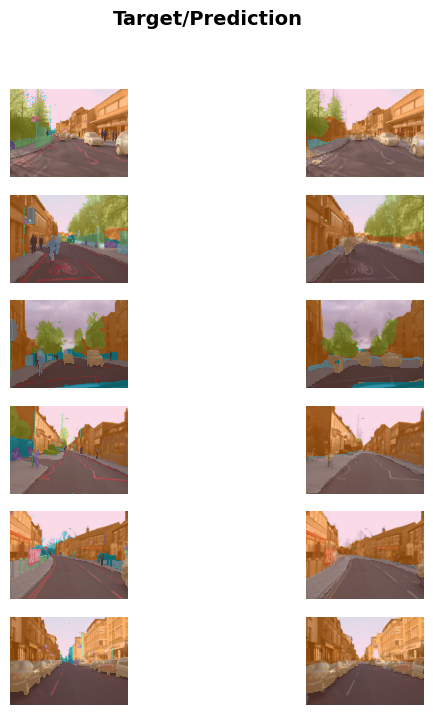

In [4]:
learn.show_results(max_n=6, figsize=(7,8))